#### Checking correct environment activated

In [1]:
import sys
print(sys.executable)

C:\Users\zouru\anaconda3\envs\tf-gpu\python.exe


#### Importing file readers

In [2]:
import os
import glob

### Initialise helper functions & datetime

In [3]:
# to measure how long algorithm takes
from datetime import datetime

#setting up helper functions
def mapper(lst,f):
    return list(map(lambda x:f(x),lst))

def typecheck(*args):
    for i in args:
        print(type(i))

#### Check curent base path

from pathlib import Path

path = Path().parent.absolute()
path

dir = 'new_zoom\\rz_pos5_white2'

#file_dir = os.path.abspath('new.txt')
a = os.path.join(os.path.normpath(dir), 'test.txt')

'More work by user'
#a = os.path.abspath(dir + '\\new.txt')
a

#pd.read_csv()

#### file traverser

for dirpath,dir,files in os.walk(pic_dir):
    print(typecheck(dirpath,dir,files))

#### Import picture parser libs

In [4]:
import numpy as np
from skimage import io, color, exposure, transform
from PIL import Image
import os
from os import listdir

# questionable .jpg checker


for filename in all_img_paths:
    if filename.endswith('.jpg'):
        try:
            img = Image.open(dir+"\\"+filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            #os.remove(base_dir+"\\"+filename) (Maybe)

## <font color='red'> IMPT  </font>

> __img = io.imread(path,plugin='matplotlib')__

-- OTHERWISE A SYNTAX ERROR IS RETURNED

In [5]:
abspath = 'C:/Users/zouru/Documents/PythonProjects/opencv/experiment'
pic_dir= r'new_zoom\rz_pos5_white2'

def mapper(lst,f):
    return list(map(lambda x: f(x),lst))


# set plugin = matplotlib'
def preprocessimg(path):
    img = io.imread(path,plugin='matplotlib')  
    img = img/255
    img = transform.resize(img,(64,114))
    
    # swap axes to make image from (224, 224, 3) to (3, 224, 224)
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    
    return img



all_img_paths = glob.glob(os.path.join(pic_dir, '*'))
np.random.shuffle(all_img_paths)

imgs=[]
labels = []   #, not relevant here as no labels

file_names = []
for img_path in all_img_paths:
        img = preprocessimg(img_path)
        imgs.append(img)
        
        # label assignment
        file_name= img_path.split('\\')[-1].replace('.jpg','')
        
        file_names.append(file_name)
        
        if int(file_name[1])>=5:
            labels.append(0)
        else:
            labels.append(1)
 
x = np.array(imgs, dtype='float32')
y = np.eye(2,dtype='uint8')[mapper(labels,int)]

print('Completed')

Completed


In [14]:
print(y)
y.shape

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


(101, 2)

### syntax testing

- all_img_paths[0].split('\\')[-1].replace('.jpg','')


### testing path assignments for os module
- os.path.join(pic_dir, '*')
- tpath = os.path.join(os.path.normpath(abspath), pic_dir ) 
- q=os.path.join(tpath, '*.jpg')

### finding filenames
- all_img_paths[0].split('\\')

### image resizing predicate
- io.imread(all_img_paths[0]).shape,'aspect ratio is ', 360/640

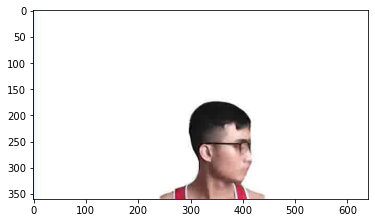

In [6]:
import matplotlib.pyplot as plt
plt.imshow(io.imread(all_img_paths[0])/255) ;

In [7]:
all_img_paths[0]

'new_zoom\\rz_pos5_white2\\0498.jpg'

In [8]:
x.shape,y.shape

((101, 3, 64, 114), (101, 2))

### model building

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

Using TensorFlow backend.


In [9]:
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus
tfback._get_available_gpus()

['/device:GPU:0']

In [52]:
x.shape

(101, 3, 64, 114)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(featurewise_center=False, 
                            featurewise_std_normalization=False, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.,)

datagen.fit(X_train)

In [120]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (5, 5), padding='same',
                     input_shape=(3,64, 114),
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    return model

model = cnn_model()
# let's train the model using SGD + momentum (how original).
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=[tf.keras.metrics.AUC()])


def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))

In [54]:
# what is flatten
# what is dense
# how to choose 
# note to write weights down into .h5 file for future use

# why?
#   swap axes to make image from (224, 224, 3) to (3, 224, 224)
#    sample = np.swapaxes(sample, 0, 2)
#    sample = np.swapaxes(sample, 1, 2)

In [121]:
batch_size = 32
nb_epoch = 15

model_hist =model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                                steps_per_epoch=X_train.shape[0],
                                epochs=nb_epoch,
                                validation_data=(X_val, Y_val),
                                callbacks=[LearningRateScheduler(lr_schedule),
                                           ModelCheckpoint('model.h5',save_best_only=True)]
                               )

Epoch 1/15
80/80 [==============================] - 10s 124ms/step - loss: 0.0049 - auc_28: 0.9998 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 2/15
80/80 [==============================] - 10s 128ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 3/15
80/80 [==============================] - 9s 112ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 4/15
80/80 [==============================] - 10s 126ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 5/15
80/80 [==============================] - 8s 106ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 6/15
80/80 [==============================] - 9s 115ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00 - val_auc_28: 1.0000
Epoch 7/15
80/80 [==============================] - 10s 121ms/step - loss: 0.0000e+00 - auc_28: 1.0000 - val_loss: 0.0000e+00

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 64, 114)       2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 62, 112)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 31, 56)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 31, 56)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 55552)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               13888250  
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)              

## Model needs to have significantly more white background in order to have be able to predict and recognise 0 values

### calculating accuracy will make more sense since values consists of more than zeroes

****
<font color='red'> careful of wrong syntax </font>

- np.array(both).shape
- np.array(white).append(ben)

' AttributeError: 'numpy.ndarray' object has no attribute 'append' '

In [14]:
def read_img(name):
    return io.imread(os.path.join(os.path.abspath('test\\'), f'{name}.jpg'))/255

def img(name):
    return os.path.join(os.path.abspath('test\\'), f'{name}.jpg')


both=[]
white = preprocessimg(img('white'))
ben = preprocessimg(img('0118'))

both.append(white)
both.append(ben)
both = np.array(both)


y_pred1 = model.predict_classes(both)
#acc = np.sum(y_pred==y_test)/np.size(y_pred)
#print("Test accuracy = {}".format(acc))
y_pred1

array([1, 1], dtype=int64)

__use .predict_classes to get class__
- picks the highest p value of n classes

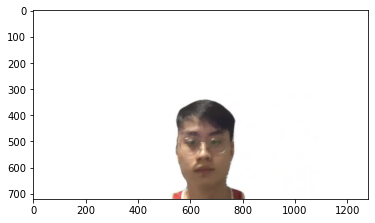

In [15]:
plt.imshow(read_img('0118'))

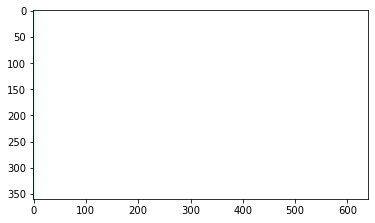

In [16]:
plt.imshow(read_img('white'))

<font color='orange'> undesirable, opens a windows viewer </font>

from PIL import Image
Image.open(img('0118')).show()


***
<font color='red'>  <ins> Demonstration of inaccuracy and absolute error </font> 
> when  model predicts even a plain white background to be label 1 <ins> 
***

## Now I will include the white pictures

In [108]:
white_dir = 'new_zoom\\white'
all_white_imgs = glob.glob(os.path.join(white_dir, '*'))

# .extend()  &  .shuffle()  does not return anything does not require assignment
all_white_imgs.extend(all_img_paths)
np.random.shuffle(all_white_imgs)

new_imgs=[]
new_labels = []   #, not relevant here as no labels

file_names = []
for img_path in all_white_imgs:
        img = preprocessimg(img_path)
        imgs.append(img)
        
        # label assignment
        file_name= img_path.split('\\')[-1].replace('.jpg','')
        # file_names.append(file_name)
        
        if int(file_name[1])>=5:
            labels.append(0)
        else:
            labels.append(1)
 
x_comb = np.array(imgs, dtype='float32')

#float_y = mapper(labels,int)
y_comb = np.eye(2,dtype='uint8')[mapper(labels,int)]

print('Completed')

Completed


### Image datagen2 for white pics + rz pics tgr

In [18]:
batch_size = 32
nb_epoch = 15

In [109]:
X2_train, X2_val, Y2_train, Y2_val = train_test_split(x_comb, y_comb, test_size=0.2, random_state=42)

datagen2 = ImageDataGenerator(featurewise_center=False, 
                            featurewise_std_normalization=False, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.,)

datagen2.fit(X2_train)

C:\Users\zouru\anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (447, 3, 64, 114) (114 channels).
  ' channels).')


In [119]:
model2 = cnn_model()

sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


model2.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=[tf.keras.metrics.AUC()])


model2_hist =model2.fit_generator(datagen2.flow(X2_train, Y2_train, batch_size=batch_size),
                                steps_per_epoch=X2_train.shape[0],
                                epochs=nb_epoch,
                                validation_data=(X2_val, Y2_val),
                                callbacks=[LearningRateScheduler(lr_schedule),
                                           ModelCheckpoint('model2.h5',save_best_only=True)]
                               )


Epoch 1/15
447/447 [==============================] - 60s 133ms/step - loss: 0.1372 - auc_27: 0.9388 - val_loss: 8.0208e-06 - val_auc_27: 0.9868
Epoch 2/15
447/447 [==============================] - 55s 122ms/step - loss: 2.1042e-04 - auc_27: 0.9932 - val_loss: 5.5431e-06 - val_auc_27: 0.9964
Epoch 3/15
447/447 [==============================] - 56s 125ms/step - loss: 2.1962e-04 - auc_27: 0.9975 - val_loss: 7.7912e-07 - val_auc_27: 0.9982
Epoch 4/15
447/447 [==============================] - 55s 122ms/step - loss: 6.7871e-05 - auc_27: 0.9986 - val_loss: 1.1495e-07 - val_auc_27: 0.9989
Epoch 5/15
447/447 [==============================] - 55s 124ms/step - loss: 1.3231e-04 - auc_27: 0.9991 - val_loss: 2.8099e-07 - val_auc_27: 0.9993
Epoch 6/15
447/447 [==============================] - 56s 125ms/step - loss: 3.3757e-05 - auc_27: 0.9994 - val_loss: 1.1495e-07 - val_auc_27: 0.9994
Epoch 7/15
447/447 [==============================] - 64s 143ms/step - loss: 1.4038e-04 - auc_27: 0.9995 - val

In [27]:
def read_img(name):
    return io.imread(os.path.join(os.path.abspath('test\\'), f'{name}.jpg'))/255

def img(name):
    return os.path.join(os.path.abspath('test\\'), f'{name}.jpg')

both=[]
white = preprocessimg(img('white'))
ben = preprocessimg(img('0118'))

both.append(white)
both.append(ben)
both = np.array(both)


y_pred1 = model.predict_classes(both)
#acc = np.sum(y_pred==y_test)/np.size(y_pred)
#print("Test accuracy = {}".format(acc))
y_pred1

array([1, 1], dtype=int64)

In [28]:
def imgf(folder_dir,filename):
    return os.path.join(os.path.normpath(f'{folder_dir}'), f'{filename}.jpg')

In [29]:
rz_pos6 = preprocessimg(imgf('new_zoom\\rz_pos6_white','0003'))

In [30]:
def appendlst2np(*args):
    new=[]
    for i in args:
        new.append(i)
    return np.array(new)

In [31]:
new_comb = appendlst2np(white,ben,rz_pos6)
model2.predict_classes(new_comb)

array([0, 1, 0], dtype=int64)

***
# <ins> Lets see how  the first model faired </ins>

note the difference in the 1st & 2nd model
    - 1st model is not trained with white pics

In [40]:
model.predict_classes(new_comb)

array([1, 1, 1], dtype=int64)

# increasing layers, same data ( w/ white backgrounds )

In [117]:
def deep_model():
    model = Sequential()

    # 1st convblock
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(3, 64,114),
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    # 2nd conv block
    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    # 3rd conv block
    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    

    model.add(Flatten())
    model.add(Dense(230, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    
    return model



model3 = deep_model()


# let's train the model using SGD + momentum (how original).
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


# compile model
model3.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=[tf.keras.metrics.AUC()])

In [118]:
model3.fit_generator(datagen2.flow(X2_train, Y2_train, batch_size=batch_size),
                                steps_per_epoch=X2_train.shape[0],
                                epochs=nb_epoch,
                                validation_data=(X2_val, Y2_val),
                                callbacks=[LearningRateScheduler(lr_schedule),
                                           ModelCheckpoint('model3.h5',save_best_only=True)]
                               )

Epoch 1/15
447/447 [==============================] - 67s 150ms/step - loss: 0.2793 - auc_26: 0.8984 - val_loss: 0.0021 - val_auc_26: 0.9444
Epoch 2/15
447/447 [==============================] - 62s 139ms/step - loss: 5.7176e-04 - auc_26: 0.9722 - val_loss: 0.0021 - val_auc_26: 0.9860
Epoch 3/15
447/447 [==============================] - 63s 142ms/step - loss: 3.5273e-05 - auc_26: 0.9907 - val_loss: 9.5564e-04 - val_auc_26: 0.9938
Epoch 4/15
447/447 [==============================] - 64s 144ms/step - loss: 2.3331e-05 - auc_26: 0.9953 - val_loss: 5.1192e-04 - val_auc_26: 0.9965
Epoch 5/15
447/447 [==============================] - 55s 123ms/step - loss: 7.7954e-05 - auc_26: 0.9972 - val_loss: 4.4094e-05 - val_auc_26: 0.9977
Epoch 6/15
447/447 [==============================] - 58s 130ms/step - loss: 4.4594e-06 - auc_26: 0.9981 - val_loss: 2.6257e-05 - val_auc_26: 0.9984
Epoch 7/15
447/447 [==============================] - 70s 156ms/step - loss: 3.3385e-06 - auc_26: 0.9986 - val_loss: 1

In [35]:
#(white,ben,rz_pos6)
model3.predict_classes(new_comb)

array([1, 1, 1], dtype=int64)

## including new data, with rz_pos_6

In [36]:
all_pos6_img = glob.glob(os.path.join('new_zoom\\rz_pos6_white', '*' ) )

def parser(img_dir_list):
    np.random.shuffle(img_dir_list)

    new_imgs=[]
    new_labels = []   #, not relevant here as no labels

    file_names = []
    for img_path in img_dir_list:
            img = preprocessimg(img_path)
            imgs.append(img)

            # label assignment
            file_name= img_path.split('\\')[-1].replace('.jpg','')
            # file_names.append(file_name)

#             if int(file_name[1]) not in [3,4]:
#                 labels.append(0)
#             else:
            labels.append(1)

    x_comb = np.array(imgs, dtype='float32')


    y_comb = np.eye(2,dtype='uint8')[mapper(labels,int)]
    
    return x_comb,y_comb

#### ONLY rz_pos6 data

In [37]:
x3,y3 = parser(all_pos6_img)

In [116]:
def deep_model2():
    model = Sequential()

    # 1st convblock
    model.add(Conv2D(32, (5, 5), padding='same',
                     input_shape=(3, 64,114),
                     activation='relu'))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    
    # 2nd conv block
    model.add(Conv2D(64, (5, 5), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
   

    # 3rd conv block
    model.add(Conv2D(128, (5, 5), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    # 4rd conv block 
    model.add(Flatten())
    model.add(Dense(230, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    
    return model


with tf.device('/GPU:0'):
    model4 = deep_model2()
    # let's train the model using SGD + momentum (how original)

    lr = 0.01
    sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


    # compile model
    model4.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[tf.keras.metrics.AUC()])


    model4_hist = model4.fit_generator( datagen2.flow(X2_train, Y2_train, batch_size=batch_size),
                                    steps_per_epoch=X2_train.shape[0],
                                    epochs=10,
                                    validation_data=(X2_val, Y2_val),
                                    callbacks=[LearningRateScheduler(lr_schedule),
                                               ModelCheckpoint('model4.h5',save_best_only=True)] )

Epoch 1/10
447/447 [==============================] - 61s 136ms/step - loss: 0.1292 - auc_25: 0.9416 - val_loss: 2.2643e-05 - val_auc_25: 0.9882
Epoch 2/10
447/447 [==============================] - 64s 142ms/step - loss: 2.1661e-05 - auc_25: 0.9941 - val_loss: 4.3553e-06 - val_auc_25: 0.9971
Epoch 3/10
447/447 [==============================] - 60s 134ms/step - loss: 8.7656e-06 - auc_25: 0.9980 - val_loss: 2.0947e-06 - val_auc_25: 0.9987
Epoch 4/10
447/447 [==============================] - 61s 137ms/step - loss: 5.6082e-06 - auc_25: 0.9990 - val_loss: 1.1751e-06 - val_auc_25: 0.9993
Epoch 5/10
447/447 [==============================] - 64s 143ms/step - loss: 4.5426e-06 - auc_25: 0.9994 - val_loss: 1.2517e-06 - val_auc_25: 0.9995
Epoch 6/10
447/447 [==============================] - 65s 145ms/step - loss: 2.9320e-06 - auc_25: 0.9996 - val_loss: 6.2585e-07 - val_auc_25: 0.9997
Epoch 7/10
447/447 [==============================] - 60s 134ms/step - loss: 3.2813e-06 - auc_25: 0.9997 - val

In [ ]:
# predicts that rz_pos_6 is indeed rz
# data consists of only rz_pos_6

y_pred4 = model4.predict_classes(x3)


TPR = (y_pred4==1).sum() / y3.size
TPR

In [43]:
#(white,ben,rz_pos6)
model4.predict_classes(new_comb)

array([0, 1, 0], dtype=int64)

***

# Testing dataset

In [80]:
test = glob.glob(os.path.join('new_zoom\\test_data', '*' ) )


def mapper(lst,f):
    return list(map(lambda x: f(x),lst))


# set plugin = matplotlib'
def preprocessimg(path):
    img = io.imread(path,plugin='matplotlib')  
    img = img/255
    img = transform.resize(img,(64,114))
    
    # swap axes to make image from (224, 224, 3) to (3, 224, 224)
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    
    return img


def parser(img_dir_list):
    np.random.shuffle(img_dir_list)

    new_imgs=[]
    new_labels = []   #, not relevant here as no labels

    file_names = []
    for img_path in img_dir_list:
            img = preprocessimg(img_path)
            new_imgs.append(img)

            # label assignment
            
            file_name = img_path.split('\\')[-1].replace('.jpg','')
            # file_names.append(file_name)

            #second digit
            if int(file_name[1]) not in [1,2,3,4]:
                 new_labels.append(0)
            else:
                new_labels.append(1)

    x_comb = np.array(new_imgs)

    y_comb = np.eye(2,dtype='uint8')[mapper(new_labels,int)]
    
    return x_comb,y_comb

# check labelling is done correctly
for img_path in test:
    file_name = img_path.split('\\')[-1].replace('.jpg','')
    print(file_name)
    print(int(file_name[1]))

In [81]:
xtest,ytest = parser(test)

***
# [ Asessment ]
***

***
# Model 1

In [130]:
model.evaluate( xtest, ytest , verbose=1 )

426/426 [==============================] - 0s 654us/step


[145.51704449720785, 0.9907712936401367]

In [131]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 32, 64, 114)       2432      
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 32, 62, 112)       9248      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 32, 31, 56)        0         
_________________________________________________________________
dropout_123 (Dropout)        (None, 32, 31, 56)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 55552)             0         
_________________________________________________________________
dense_73 (Dense)             (None, 250)               13888250  
_________________________________________________________________
dropout_124 (Dropout)        (None, 250)             

***
# Model 2

In [132]:
model2.evaluate( xtest, ytest , verbose=1 )

426/426 [==============================] - 0s 666us/step


[8.701884813711677, 0.9983693361282349]

In [133]:
model2.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 32, 64, 114)       2432      
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 62, 112)       9248      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 32, 31, 56)        0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 32, 31, 56)        0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 55552)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 250)               13888250  
_________________________________________________________________
dropout_122 (Dropout)        (None, 250)             

***
# Model 3

In [134]:
model3.evaluate( xtest, ytest , verbose=1 )

426/426 [==============================] - 0s 894us/step


[14.071976773615734, 0.9982091784477234]

In [127]:
model3.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 32, 64, 114)       896       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 32, 62, 112)       9248      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 32, 31, 56)        0         
_________________________________________________________________
dropout_117 (Dropout)        (None, 32, 31, 56)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 64, 31, 56)        18496     
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 64, 29, 54)        36928     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 64, 14, 27)      

***
# Model 4

In [135]:
model4.evaluate( xtest, ytest , verbose=1 )

426/426 [==============================] - 0s 948us/step


[9.215025910749121, 0.9976353049278259]

In [129]:
model4.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 32, 64, 114)       2432      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 32, 60, 110)       25632     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 32, 30, 55)        0         
_________________________________________________________________
dropout_113 (Dropout)        (None, 32, 30, 55)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 64, 30, 55)        51264     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 64, 26, 51)        102464    
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 64, 13, 25)      

In [136]:
# (white,ben,rz_pos6)
model.predict_classes(new_comb)

array([1, 1, 1], dtype=int64)

In [138]:
model2.predict_classes(new_comb)

array([0, 1, 1], dtype=int64)

In [140]:
model3.predict_classes(new_comb)

array([0, 1, 1], dtype=int64)

In [137]:
#(white,ben,rz_pos6)
model4.predict_classes(new_comb)

array([0, 1, 1], dtype=int64)